In [ ]:
# importing OpenCV library
import cv2
# importing NumPy library for numerical operations
import numpy as np
# importing pyplot module from Matplotlib for plots and images
import matplotlib.pyplot as plt

# Task 1: Loading and retrieving RGB channels of an image
Load imageA.jpeg using OpenCV and display its individual
color channels (in the RGB space) with labels.


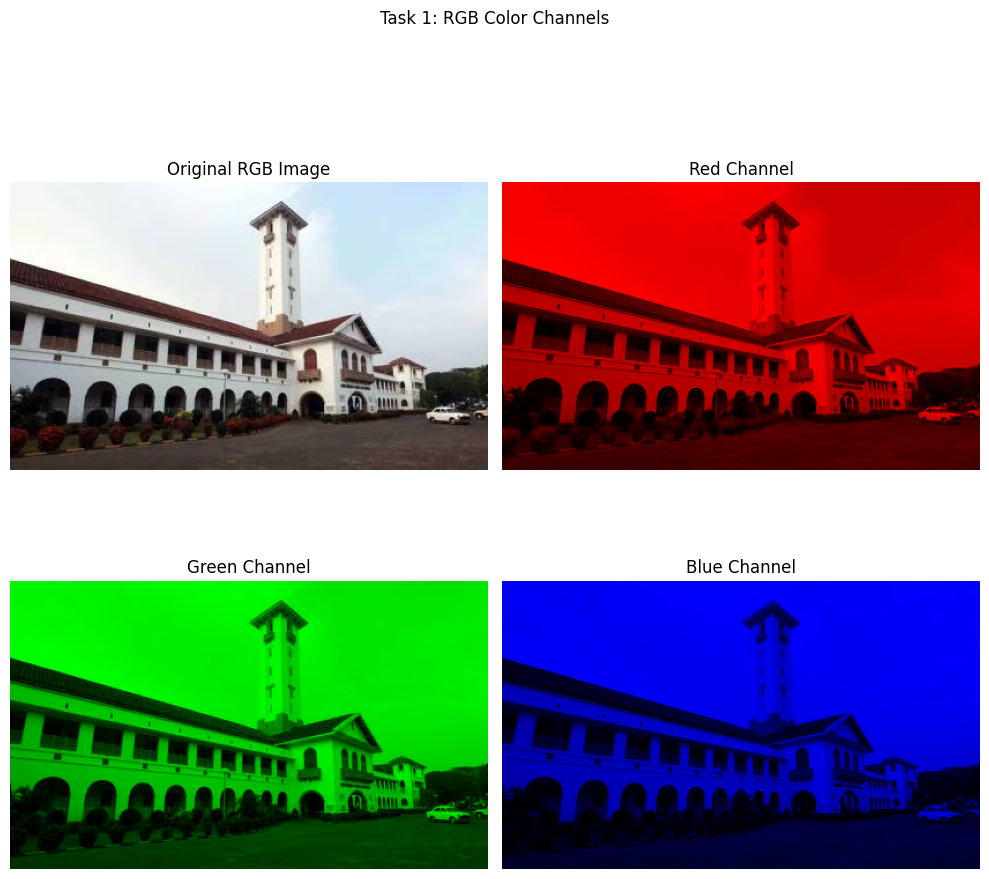

In [ ]:
# Here we are loading the image using OpenCV
# using try and except to deal unavailable image error
try:
    # read image using OpenCV
    imageA = cv2.imread('imageA.jpeg')
    # Converting from BGR which is OpenCV default to RGB for correct diplay of each channel
    imageA_rgb = cv2.cvtColor(imageA, cv2.COLOR_BGR2RGB)
except cv2.error as e:
    # printing the error message for unavailability of image
    print(f"Error loading imageA.jpeg: {e}")
    # Create a dummy image to allow the rest of the script to run
    imageA_rgb = np.zeros((100, 100, 3), dtype=np.uint8)

# creating zero arrays for individual channels

# to get red channel
# creates copy of original images to modify the red channel view.
r_channel = imageA_rgb.copy()
# here it setes green channel (index 1) values to 0 for all pixels.
r_channel[:, :, 1] = 0
# here it setes blue channel (index 2) values to 0 for all pixels.
r_channel[:, :, 2] = 0

# to get green channel
# creates copy of original images to modify the green channel view.
g_channel = imageA_rgb.copy()
# here it setes red channel (index 0) values to 0 for all pixels.
g_channel[:, :, 0] = 0
# here it setes blue channel (index 2) values to 0 for all pixels.
g_channel[:, :, 2] = 0

# to get blue channel
# creates copy of original images to modify the blue channel view.
b_channel = imageA_rgb.copy()
# here it setes red channel (index 0) values to 0 for all pixels.
b_channel[:, :, 0] = 0
# here it setes green channel (index 1) values to 0 for all pixels.
b_channel[:, :, 1] = 0

# Display the channels
# here 2, 2 means the grid of plot with 2 row  and 2 columns, so we get 2 plots side by side
# figsize=(20, 5) means 20 inches wide and 5 inches tall
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Displaying the original image in the first row, first column
axes[0, 0].imshow(imageA_rgb)
axes[0, 0].set_title('Original RGB Image')
axes[0, 0].axis('off')

# Displaying Red Channel in the first row, second column
axes[0, 1].imshow(r_channel)
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

# Displayint Green Channel in the second row, first column
axes[1, 0].imshow(g_channel)
axes[1, 0].set_title('Green Channel')
axes[1, 0].axis('off')

# Displaying Blue Channel in the second row, second column
axes[1, 1].imshow(b_channel)
axes[1, 1].set_title('Blue Channel')
axes[1, 1].axis('off')

plt.suptitle('Task 1: RGB Color Channels')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Task 2: Color Space Conversion
Convert the RGB image to the following color spaces (manually) and display the
individual channels with labels. Compare your results with that obtained by using
OpenCV functions.

*   HSV color spaces (refer to class slides for formula to convert RGB to HSV).
*    Lab color space




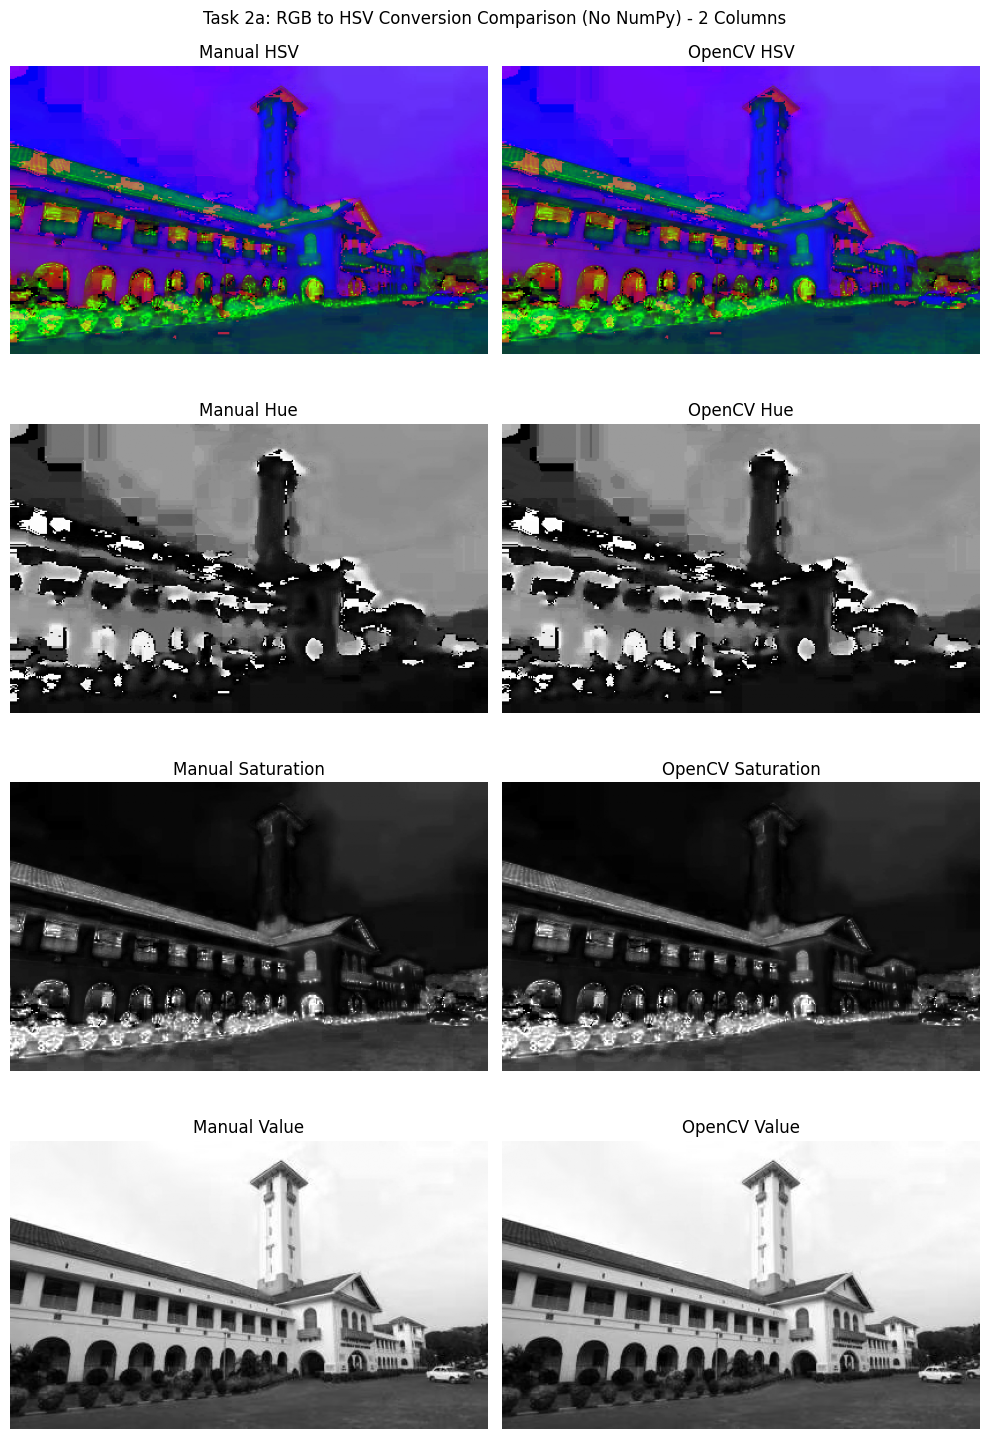

In [ ]:
# funtion to convert RGB into HSV
def RGBtoHSVmanual(rgbImage):
    # here taking image dimensions
    # gettingg number of rows (height)
    height = len(rgbImage)
    # getting number of columns (width)
    width = len(rgbImage[0])

    # creating empty HSV image
    hsvImage = []
    for _ in range(height):
      row = []
      for _ in range(width):
        # initialized with [0, 0, 0] for each pixel
        row.append([0, 0, 0])
      hsvImage.append(row)

    # looping for each pixel
    for i in range(height):
        for j in range(width):
            # extracting R, G, B values for pixel
            R, G, B = rgbImage[i][j]

            # Normalize RGB values in the range [0, 1]
            Rn = R / 255.0
            Gn = G / 255.0
            Bn = B / 255.0

            # Get Maximum and Minimum of Rn, Gn, Bn
            # maximum channel value
            Cmax = max(Rn, Gn, Bn)
            # minimum channel value
            Cmin = min(Rn, Gn, Bn)
            # difference between max and min
            delta = Cmax - Cmin

            # Hue calculation
            if delta == 0:
                # Hue is 0 when all channels are equal (gray color)
                H = 0
            elif Cmax == Rn:
                H = (60 * ((Gn - Bn) / delta) + 360) % 360
            elif Cmax == Gn:
                H = (60 * ((Bn - Rn) / delta) + 120) % 360
            else:  # Cmax == Bn
                H = (60 * ((Rn - Gn) / delta) + 240) % 360

            # Saturation calculation
            if Cmax == 0:
                # avoid division by 0, no color means saturation is 0
                S = 0
            else:
                # saturaion formula
                S = delta / Cmax

            # Value calculation
            # keeping Brightness to the nax channel value
            V = Cmax

            # Scaling to OpenCV ranges
            # OpenCV uses Hue in range 0 - 179 instead 0 - 360
            HScaled = int(H / 2)
            # OpenCV uses Saaturation in range 0 - 255
            SScaled = int(S * 255)
            # OpenCV uses Value in range 0 - 255
            VScaled = int(V * 255)

            # storing HSV values for this pixel
            hsvImage[i][j] = [HScaled, SScaled, VScaled]
    # return converted HSV image
    return hsvImage

# Load image in RGB format
imageA_rgb = cv2.cvtColor(cv2.imread("imageA.jpeg"), cv2.COLOR_BGR2RGB)

# RGB conversion to HSV
hsvManual = RGBtoHSVmanual(imageA_rgb.tolist())

# OpenCV conversion for comparison
hsvOpencv = cv2.cvtColor(imageA_rgb, cv2.COLOR_RGB2HSV)

# Creating figure with 4 rows × 2 columns (manual vs OpenCV)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Row 1: Full HSV
# Manual HSV image
axes[0, 0].imshow(hsvManual)
axes[0, 0].set_title('Manual HSV')
axes[0, 0].axis('off')

# OpenCV HSV image
axes[0, 1].imshow(hsvOpencv)
axes[0, 1].set_title('OpenCV HSV')
axes[0, 1].axis('off')

# Row 2: Hue
# Manual Hue
manualHue = []
for row in hsvManual:
    hueRow = []
    for p in row:
        hueRow.append(p[0])
    manualHue.append(hueRow)

axes[1, 0].imshow(manualHue, cmap='gray')
axes[1, 0].set_title('Manual Hue')
axes[1, 0].axis('off')

# OpenCV Hue
axes[1, 1].imshow(hsvOpencv[:, :, 0], cmap='gray')
axes[1, 1].set_title('OpenCV Hue')
axes[1, 1].axis('off')

# Row 3: Saturation
# Manual Saturation
manualSaturation = []
for row in hsvManual:
    satRow = []
    for p in row:
        satRow.append(p[1])
    manualSaturation.append(satRow)

axes[2, 0].imshow(manualSaturation, cmap='gray')
axes[2, 0].set_title('Manual Saturation')
axes[2, 0].axis('off')

# OpenCV Saturation
axes[2, 1].imshow(hsvOpencv[:, :, 1], cmap='gray')
axes[2, 1].set_title('OpenCV Saturation')
axes[2, 1].axis('off')

# Row 4: Value
# Manual Value
manualValue = []
for row in hsvManual:
    valueRow = []
    for p in row:
        valueRow.append(p[2])
    manualValue.append(valueRow)

axes[3, 0].imshow(manualValue, cmap='gray')
axes[3, 0].set_title('Manual Value')
axes[3, 0].axis('off')

# OpenCV Value
axes[3, 1].imshow(hsvOpencv[:, :, 2], cmap='gray')
axes[3, 1].set_title('OpenCV Value')
axes[3, 1].axis('off')

plt.suptitle('Task 2a: RGB to HSV Conversion Comparison (No NumPy) - 2 Columns')
plt.tight_layout()
plt.show()


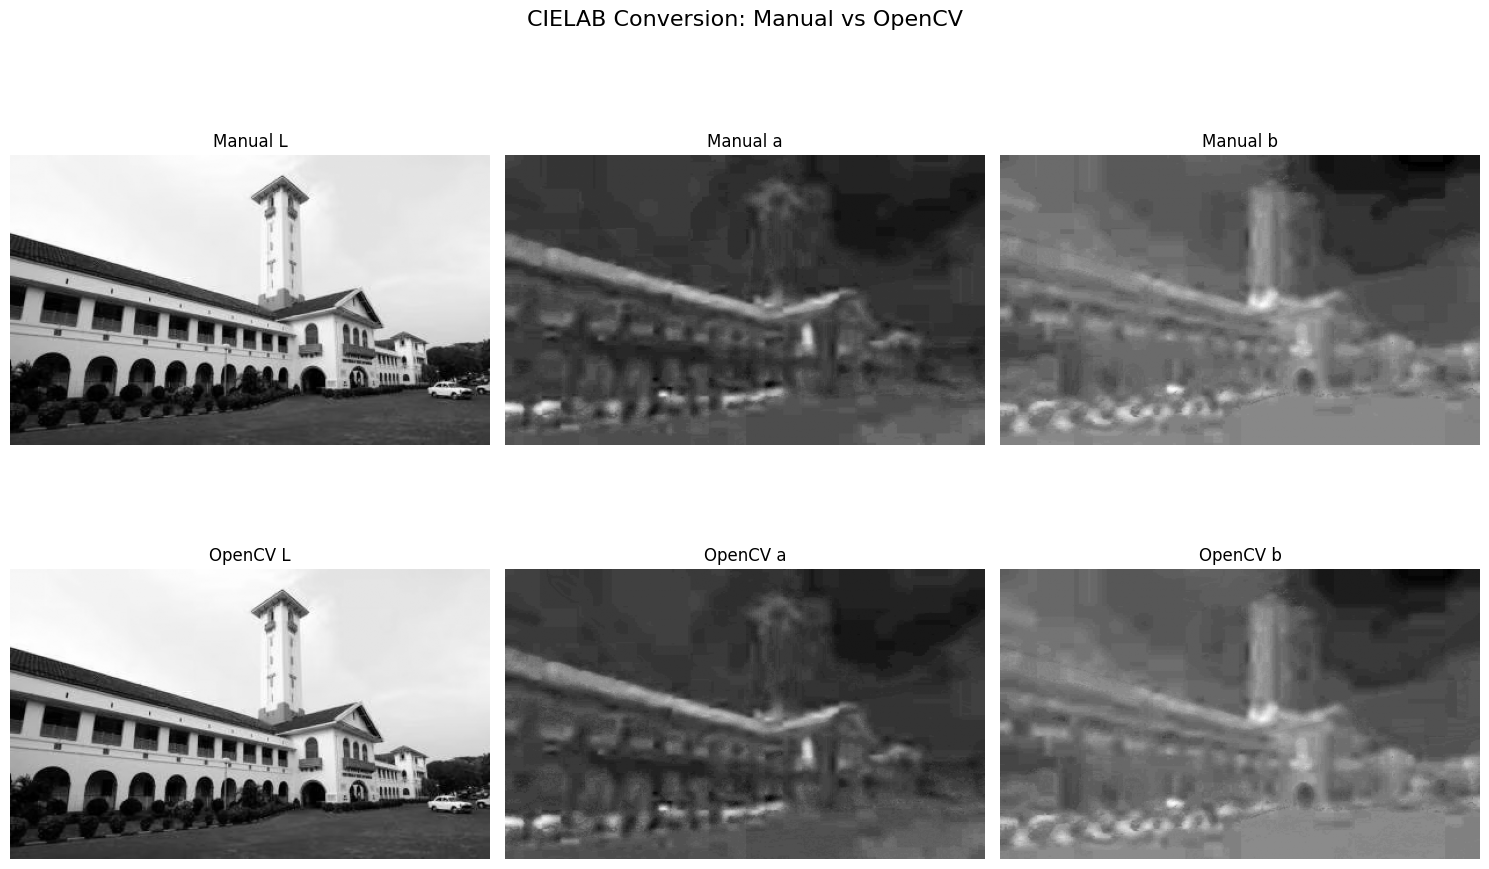

In [ ]:
# Normalize RGB value from range 0-255 to range 0-1
rgb = imageA_rgb / 255.0

# Function to apply inverse gamma correction ( sRGB -> linear RGB)
def inverse_gamma_correction(c):
    # threshold
    mask = c > 0.04045
    # for pixels above threshold -> apply nonlinear formula
    # for pixels below threshold -> scale linearly
    return np.where(mask, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

# apply inverse gamma correction to normalized RGB image
linear_rgb = inverse_gamma_correction(rgb)

# Transformation matrix from linear RGB to XYX color space
M = np.array([[0.4124564, 0.3575761, 0.1804375],
              [0.2126729, 0.7151522, 0.0721750],
              [0.0193339, 0.1191920, 0.9503041]])

# perform matrix multiplpication
# It converts linear RGB values into CIE XYZ color space
xyz = np.dot(linear_rgb, M.T)

# given reference while point
Xn, Yn, Zn = 0.95047, 1.00000, 1.08883

# Normalizing XYZ by reference while point to get Lab conversion
X, Y, Z = xyz[:, :, 0] / Xn, xyz[:, :, 1] / Yn, xyz[:, :, 2] / Zn

# function to apply f(t) in Lab Conversion
def f(t):
    delta = 6/29
    # above threshold then cube root
    # below threshold then linear approximation
    return np.where(t > delta**3, t ** (1/3), (t / (3 * delta**2)) + (4 / 29))

# applying f funtion to normalized XYZ channels
fx, fy, fz = f(X), f(Y), f(Z)

# CIELAB formula components
# Lightness channel
L = 116 * fy - 16
# green-red channel a*
a = 500 * (fx - fy)
# blue-yellow channel b*
b = 200 * (fy - fz)

# Convert to uint8 for display
L_display = np.clip(L * 255 / 100, 0, 255).astype(np.uint8)
a_display = np.clip((a + 128), 0, 255).astype(np.uint8)
b_display = np.clip((b + 128), 0, 255).astype(np.uint8)


# OpenCV built-in conversion for comparision RGB 0> Lab
lab_cv = cv2.cvtColor(imageA_rgb, cv2.COLOR_RGB2LAB)
# Split OpenCV LAb image into each seperate channels
L_cv, a_cv, b_cv = cv2.split(lab_cv)

# funtion for meanul vs OpenCV Lab channels side by side
def show_lab_comparison(L1, a1, b1, L2, a2, b2):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # channel names
    titles = ["L", "a", "b"]
    # Row Labels
    sources = ["Manual", "OpenCV"]
    # dataset for both rows
    sets = [(L1, a1, b1), (L2, a2, b2)]

    # loop over rows (manual vs OpenCV) and olumns (L, a, b)
    for row in range(2):
        for col in range(3):
            # display channel
            axes[row, col].imshow(sets[row][col], cmap='gray')
            # title
            axes[row, col].set_title(f"{sources[row]} {titles[col]}")
            axes[row, col].axis('off')

    plt.suptitle("CIELAB Conversion: Manual vs OpenCV", fontsize=16)
    plt.tight_layout()
    plt.show()

# show both side by side
show_lab_comparison(L_display, a_display, b_display, L_cv, a_cv, b_cv)

# Task 3: Bilinear interpolation
Crop the central 200x300 patch from the image and resize it to the full size of the image
using bilinear interpolation. Compare your results with that obtained by using OpenCV
functions


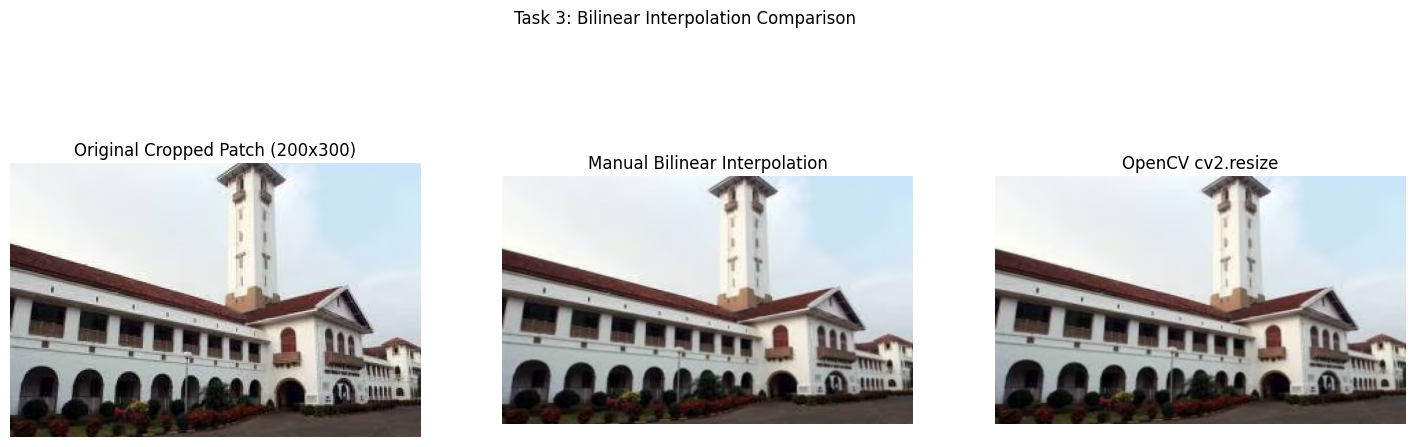

In [ ]:
# getting image height, widthm and number of channels
h, w, _ = imageA_rgb.shape
# get top-left starting point for crop
start_h, start_w = h // 2 - 100, w // 2 - 150
# extract patch
cropped_image = imageA_rgb[start_h:start_h + 200, start_w:start_w + 300]


# Function for Manual Bilinear Interpolation
def bilinear_interpolation(image, output_h, output_w):
    # get input dimenstions
    input_h, input_w, C = image.shape
    # creating empty output image of given size
    output_image = np.zeros((output_h, output_w, C), dtype=np.uint8)

    # Calculating scaling ratio between input and output sizes
    h_ratio = float(input_h - 1) / (output_h - 1)
    w_ratio = float(input_w - 1) / (output_w - 1)

    # Loop over each channel separately (R, G, B)
    for c in range(C):
        # Loop over each pixel in the output image
        for y_out in range(output_h):
            for x_out in range(output_w):
                # Map output pixel position to input image coordinates
                x_in = x_out * w_ratio
                y_in = y_out * h_ratio

                # Get integer coordinate of top-left neighbor
                x1 = int(np.floor(x_in))
                y1 = int(np.floor(y_in))

                # Get bottom-right neighbor coordinates
                x2 = min(x1 + 1, input_w - 1)
                y2 = min(y1 + 1, input_h - 1)

                # Calculate fractional distances
                dx = x_in - x1
                dy = y_in - y1

                # Get pixel values from the four surrounding neighbors
                p11 = image[y1, x1, c]  # Top-left
                p12 = image[y2, x1, c]  # Bottom-left
                p21 = image[y1, x2, c]  # Top-right
                p22 = image[y2, x2, c]  # Bottom-right

                # Performing bilinear interpolation:
                # Weighted average based on dx, dy
                inter_val = (
                    p11 * (1 - dx) * (1 - dy) +  # Top-left weight
                    p21 * dx * (1 - dy) +        # Top-right weight
                    p12 * (1 - dx) * dy +        # Bottom-left weight
                    p22 * dx * dy                # Bottom-right weight
                )

                # Cliping to 0, 255 and assign it to output pixel
                output_image[y_out, x_out, c] = np.clip(inter_val, 0, 255)

    # return resized image
    return output_image

# get manual bilinear interpolation
resized_manual = bilinear_interpolation(cropped_image, h, w)

# Resize using OpenCV built-in bilinear interpolation
resized_opencv = cv2.resize(cropped_image, (w, h), interpolation=cv2.INTER_LINEAR)

# Displaying results for comparison
# Creating figure of a 1-row, 3-column
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# ṣhowing cropped patch
axes[0].imshow(cropped_image)
axes[0].set_title('Original Cropped Patch (200x300)')
# Hide axes
axes[0].axis('off')

# displaying manual bilinear interpolation result
axes[1].imshow(resized_manual)
axes[1].set_title('Manual Bilinear Interpolation')
axes[1].axis('off')

# Displaying OpenCV bilinear interpolation result
axes[2].imshow(resized_opencv)
axes[2].set_title('OpenCV cv2.resize')
axes[2].axis('off')

# title
plt.suptitle('Task 3: Bilinear Interpolation Comparison')
plt.show()


# Task 4: Blending Images
Blend a IIT KGP logo (i.e imageB.jpg in assignment resources) with imageA using alpha
blending. Choose a reasonable value of alpha (eg. 0.5). Display the blended image.

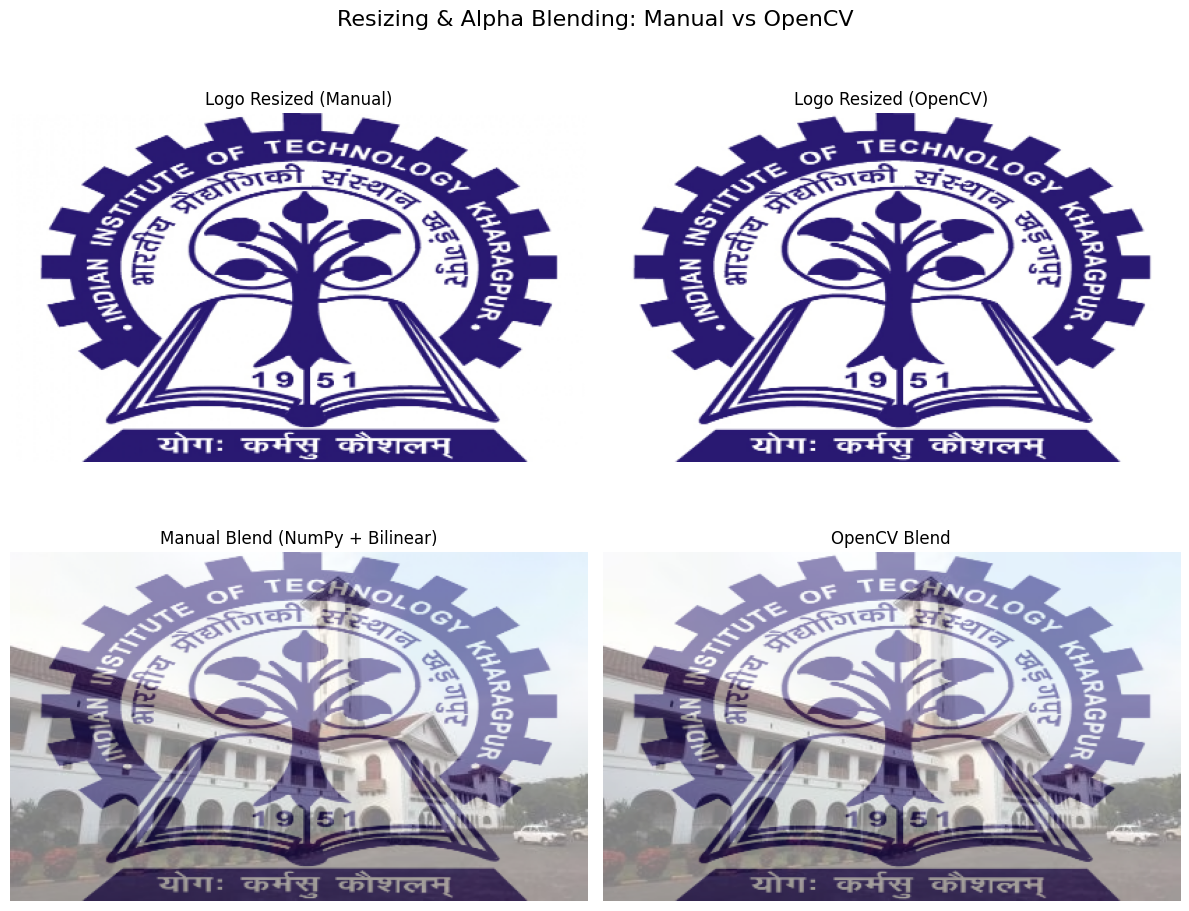

In [ ]:
try:
    # loading image
    imageB = plt.imread('imageB.jpg')
    if imageB.dtype == np.float32 or imageB.dtype == np.float64:
        imageB = (imageB * 255).astype(np.uint8)  # Convert float [0,1] to uint8
except FileNotFoundError:
    # errot message
    print("imageB.jpg not found. Creating dummy white image.")
    # craetin white image to get script run
    imageB = np.ones_like(imageA_rgb) * 255

# Manual resizing using bilinear interpolation function
hA, wA, _ = imageA_rgb.shape
imageB_resized_manual = bilinear_interpolation(imageB, hA, wA)  # Your earlier function

# Alpha blending parameters
alpha = 0.5

# Manual blending (NumPy only)
blended_manual = (alpha * imageA_rgb + (1 - alpha) * imageB_resized_manual).astype(np.uint8)

# comparing OpenCV resize + OpenCV blend
imageB_resized_cv = cv2.resize(imageB, (wA, hA))
blended_opencv = cv2.addWeighted(imageA_rgb, alpha, imageB_resized_cv, 1 - alpha, 0)

# Displaying comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(imageB_resized_manual)
axes[0, 0].set_title('Logo Resized (Manual)')
axes[0, 0].axis('off')

axes[0, 1].imshow(imageB_resized_cv)
axes[0, 1].set_title('Logo Resized (OpenCV)')
axes[0, 1].axis('off')

axes[1, 0].imshow(blended_manual)
axes[1, 0].set_title('Manual Blend (NumPy + Bilinear)')
axes[1, 0].axis('off')

axes[1, 1].imshow(blended_opencv)
axes[1, 1].set_title('OpenCV Blend')
axes[1, 1].axis('off')

plt.suptitle('Resizing & Alpha Blending: Manual vs OpenCV', fontsize=16)
plt.tight_layout()
plt.show()

# Task 5: Extracting and Displaying Image Bit planes
Load noisy image (i.e imageC.jpg in assignment resources); extract and display its
individual bit planes with proper labels.


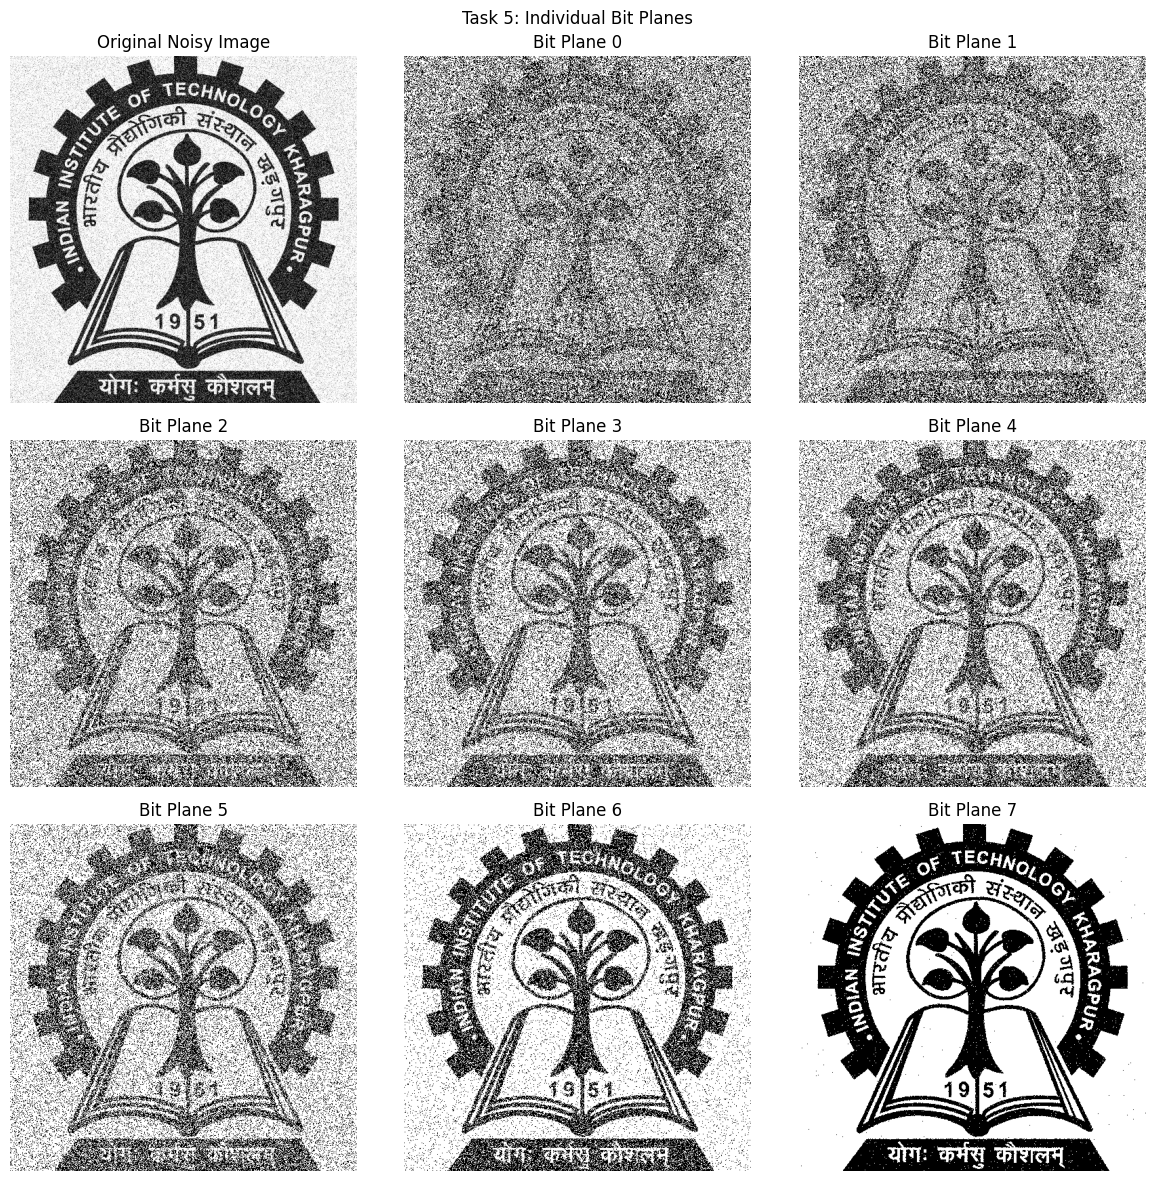

In [ ]:
# Loading noisy image and converting into grayscale
try:
    imageC = cv2.imread('ImageC.jpg', cv2.IMREAD_GRAYSCALE)
except cv2.error as e:
    # error message if image is not available
    print(f"Error loading imageC.jpg: {e}")
    # Creating dummy image for script to run
    imageC = np.random.randint(0, 256, (100, 100), dtype=np.uint8)


# Extracting bit planes
bit_planes = []
for i in range(8):
    # Creating plane by getting the i-th bit
    plane = (imageC >> i) & 1
    bit_planes.append(plane * 255) # Multiply by 255 for visualization

# Displing the bit planes
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()
axes[0].imshow(imageC, cmap='gray')
axes[0].set_title('Original Noisy Image')
axes[0].axis('off')

# loop for 0-7 bits
for i in range(8):
    axes[i+1].imshow(bit_planes[i], cmap='gray')
    axes[i+1].set_title(f'Bit Plane {i}')
    axes[i+1].axis('off')

plt.suptitle('Task 5: Individual Bit Planes')
plt.tight_layout()
plt.show()

# Task 6: Removing Noise
Reconstruct the image by using MSB planes only (e.g. by discarding the lower bit
planes. Choose a suitable value for the number of bit planes to be used for
reconstruction). The discarded bit planes can be set to 0 or a constant value.


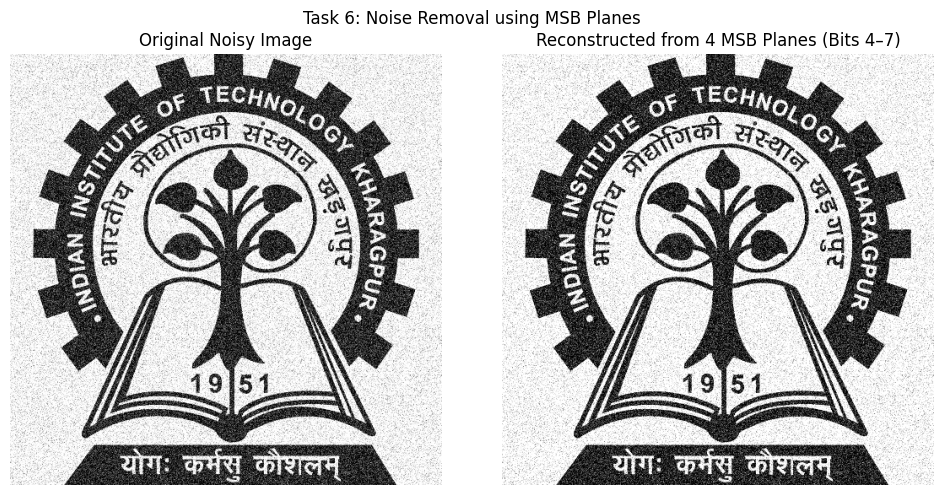

In [ ]:
# Choose number of MSB planes to keep (4 → bits 7, 6, 5, 4)
keep_bits = 4

# Reconstructing the image from MSBs
reconstructed = np.zeros_like(imageC, dtype=np.uint8)
for i in range(8 - keep_bits, 8):  # Keeping bits 4 to 7
    reconstructed += ((imageC >> i) & 1) << i

# Displaying comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imageC, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title(f'Reconstructed from {keep_bits} MSB Planes (Bits {8-keep_bits}–7)')
plt.axis('off')

plt.suptitle('Task 6: Noise Removal using MSB Planes')
plt.tight_layout()
plt.show()


# Task 7: Give Explanation
What is the impact of discarding the least significant bit planes on the noise in the
reconstructed image? Explain your answer.


Assignment Overview
This assignment is about focusing on fundamental image processing operations. These tasks involves color space manipulation, image scaling, blending, and noise reduction techniques. The main requirement is to implement these operations from scratch using NumPy and the compare results with OpenCV functions.

**Task 7: Explanation**

In the 8-bit grayscale image, each pixel is represented by 8 binary bits.least significant bits (LSB) bits from 0–3 have comapritively less effect on overall brightness of image but they are highly sensitive to random noise. By discarding these lower bits, we can eliminate good portion of the noise.

such process helps in reconstructing the clean image which keeps essential features while ignoring irrelevant variations. But removing too many LSBs can give results which may give loss of fine details.

In this assignment, we have used only the top 4 bits (MSBs) which gave noticeable improvement in visual quality with reduced noise.
